In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,accuracy_score, f1_score

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")



from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.ensemble import RandomForestClassifier


Bad key text.latex.unicode in file c:\users\avraw\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file c:\users\avraw\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file c:\users\avraw\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 444 ('pgf.debug           : Fa

In [2]:
travel_train= pd.read_csv('Traveldata_train.csv')
travel_test= pd.read_csv('Traveldata_test.csv')
survey_train= pd.read_csv('Surveydata_train.csv')
survey_test= pd.read_csv('Surveydata_test.csv')

In [3]:
travel_train.shape, survey_train.shape,travel_test.shape,survey_test.shape

((94379, 9), (94379, 17), (35602, 9), (35602, 16))

In [4]:
survey_train.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [5]:
survey_test.head()

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [6]:
df1_train = pd.merge(travel_train, survey_train, on='ID') 
df1_train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [7]:
df1_train.shape

(94379, 25)

In [8]:
df1_test = pd.merge(travel_test, survey_test, on='ID') 
df1_test.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0,Acceptable,...,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0,Extremely Poor,...,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,Acceptable,...,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [9]:
df1_test.shape

(35602, 24)

In [10]:
df1_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

In [11]:
df1_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
 9   Seat_Comfort             35580 non-null  object 
 10  Seat_Class               35602 non-null  object 
 11  Arrival_Time_Convenient  32277 non-null  object 
 12  Catering                 32245 non-null  object 
 13  Platform_Location        35590 non-null  object 
 14  Onboard_Wifi_Service  

In [12]:
df1_train.nunique()

ID                         94379
Gender                         2
Customer_Type                  2
Age                           75
Type_Travel                    2
Travel_Class                   2
Travel_Distance             5210
Departure_Delay_in_Mins      437
Arrival_Delay_in_Mins        434
Overall_Experience             2
Seat_Comfort                   6
Seat_Class                     2
Arrival_Time_Convenient        6
Catering                       6
Platform_Location              6
Onboard_Wifi_Service           6
Onboard_Entertainment          6
Online_Support                 6
Ease_of_Online_Booking         6
Onboard_Service                6
Legroom                        6
Baggage_Handling               5
CheckIn_Service                6
Cleanliness                    6
Online_Boarding                6
dtype: int64

In [13]:
df1_test.nunique()

ID                         35602
Gender                         2
Customer_Type                  2
Age                           75
Type_Travel                    2
Travel_Class                   2
Travel_Distance             4644
Departure_Delay_in_Mins      350
Arrival_Delay_in_Mins        355
Seat_Comfort                   6
Seat_Class                     2
Arrival_Time_Convenient        6
Catering                       6
Platform_Location              5
Onboard_Wifi_Service           6
Onboard_Entertainment          6
Online_Support                 5
Ease_of_Online_Booking         6
Onboard_Service                5
Legroom                        6
Baggage_Handling               5
CheckIn_Service                5
Cleanliness                    5
Online_Boarding                6
dtype: int64

In [14]:
df2_train = df1_train.drop(['ID','Arrival_Delay_in_Mins','Seat_Class'], axis = 1)
df2_test = df1_test.drop(['ID','Arrival_Delay_in_Mins','Seat_Class'], axis = 1)                           

In [15]:
#check:
df2_train.shape, df2_test.shape

((94379, 22), (35602, 21))

In [16]:
df2_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   94302 non-null  object 
 1   Customer_Type            85428 non-null  object 
 2   Age                      94346 non-null  float64
 3   Type_Travel              85153 non-null  object 
 4   Travel_Class             94379 non-null  object 
 5   Travel_Distance          94379 non-null  int64  
 6   Departure_Delay_in_Mins  94322 non-null  float64
 7   Overall_Experience       94379 non-null  int64  
 8   Seat_Comfort             94318 non-null  object 
 9   Arrival_Time_Convenient  85449 non-null  object 
 10  Catering                 85638 non-null  object 
 11  Platform_Location        94349 non-null  object 
 12  Onboard_Wifi_Service     94349 non-null  object 
 13  Onboard_Entertainment    94361 non-null  object 
 14  Online_Support        

In [17]:
df2_train.nunique()

Gender                        2
Customer_Type                 2
Age                          75
Type_Travel                   2
Travel_Class                  2
Travel_Distance            5210
Departure_Delay_in_Mins     437
Overall_Experience            2
Seat_Comfort                  6
Arrival_Time_Convenient       6
Catering                      6
Platform_Location             6
Onboard_Wifi_Service          6
Onboard_Entertainment         6
Online_Support                6
Ease_of_Online_Booking        6
Onboard_Service               6
Legroom                       6
Baggage_Handling              5
CheckIn_Service               6
Cleanliness                   6
Online_Boarding               6
dtype: int64

In [18]:
df2_train['Overall_Experience'].value_counts(normalize =True)

1    0.546658
0    0.453342
Name: Overall_Experience, dtype: float64

In [19]:
platform_map1 = {
    "Very Inconvenient": 1,
    "Inconvenient": 2,
    "Needs Improvement": 3,
    "Manageable": 4,
    "Convenient": 5,
    "Very Convenient": 6
}
df2_train["Platform_Location"] = df2_train["Platform_Location"].map(platform_map1)


In [20]:
platform_map2 = {
    "Extremely Poor": 1,
    "Poor": 2,
    "Needs Improvement": 3,
    "Acceptable": 4,
    "Good": 5,
    "Excellent": 6
}
df2_train["Online_Boarding"] = df2_train["Online_Boarding"].map(platform_map2)
df2_train["Cleanliness"] = df2_train["Cleanliness"].map(platform_map2)
df2_train["CheckIn_Service"] = df2_train["CheckIn_Service"].map(platform_map2)
df2_train["Baggage_Handling"] = df2_train["Baggage_Handling"].map(platform_map2)
df2_train["Legroom"] = df2_train["Legroom"].map(platform_map2)
df2_train["Onboard_Service"] = df2_train["Onboard_Service"].map(platform_map2)
df2_train["Ease_of_Online_Booking"] = df2_train["Ease_of_Online_Booking"].map(platform_map2)
df2_train["Online_Support"] = df2_train["Online_Support"].map(platform_map2)
df2_train["Onboard_Entertainment"] = df2_train["Onboard_Entertainment"].map(platform_map2)
df2_train["Onboard_Wifi_Service"] = df2_train["Onboard_Wifi_Service"].map(platform_map2)
df2_train["Catering"] = df2_train["Catering"].map(platform_map2)
df2_train["Arrival_Time_Convenient"] = df2_train["Arrival_Time_Convenient"].map(platform_map2)
df2_train["Seat_Comfort"] = df2_train["Seat_Comfort"].map(platform_map2)



In [21]:
#platform_map3 = {
#    "Ordinary": 0,
#    "Green Car": 1,
#}
#df2_train["Seat_Class"] = df2_train["Seat_Class"].map(platform_map3)
#-----------------------------------------------------------------------------
platform_map4 = {
    "Male": 0,
    "Female": 1,
}
df2_train["Gender"] = df2_train["Gender"].map(platform_map4)
#-----------------------------------------------------------------------------
platform_map5 = {
    "Loyal Customer": 0,
    "Disloyal Customer": 1,
}
df2_train["Customer_Type"] = df2_train["Customer_Type"].map(platform_map5)
#-----------------------------------------------------------------------------
platform_map6 = {
    "Business": 0,
    "Eco": 1,
}
df2_train["Travel_Class"] = df2_train["Travel_Class"].map(platform_map6)
#-----------------------------------------------------------------------------

platform_map7 = {
    "Personal Travel": 0,
    "Business Travel": 1,
}
df2_train["Type_Travel"] = df2_train["Type_Travel"].map(platform_map7)









In [22]:
# fill missing values:
df2_train["Age"] = df2_train["Age"].fillna(df2_train["Age"].mean())
df2_train["Departure_Delay_in_Mins"] = df2_train["Departure_Delay_in_Mins"].fillna(df2_train["Departure_Delay_in_Mins"].median())
#df2_train["Arrival_Delay_in_Mins"] = df2_train["Arrival_Delay_in_Mins"].fillna(df2_train["Arrival_Delay_in_Mins"].median())
#-------------------------------------------------------------------------------------------------------------------------
df2_train["Gender"] = df2_train["Gender"].fillna(df2_train["Gender"].mode()[0])
df2_train["Customer_Type"] = df2_train["Customer_Type"].fillna(df2_train["Customer_Type"].mode()[0])
df2_train["Type_Travel"] = df2_train["Type_Travel"].fillna(df2_train["Type_Travel"].mode()[0])
#-------------------------------------------------------------------------------------------------------------------------
df2_train["Seat_Comfort"] = df2_train["Seat_Comfort"].fillna(df2_train["Seat_Comfort"].mode()[0])
df2_train["Arrival_Time_Convenient"] = df2_train["Arrival_Time_Convenient"].fillna(df2_train["Arrival_Time_Convenient"].mode()[0])
df2_train["Catering"] = df2_train["Catering"].fillna(df2_train["Catering"].mode()[0])
df2_train["Onboard_Wifi_Service"] = df2_train["Onboard_Wifi_Service"].fillna(df2_train["Onboard_Wifi_Service"].mode()[0])
df2_train["Onboard_Entertainment"] = df2_train["Onboard_Entertainment"].fillna(df2_train["Onboard_Entertainment"].mode()[0])
df2_train["Online_Support"] = df2_train["Online_Support"].fillna(df2_train["Online_Support"].mode()[0])
df2_train["Ease_of_Online_Booking"] = df2_train["Ease_of_Online_Booking"].fillna(df2_train["Ease_of_Online_Booking"].mode()[0])
df2_train["Onboard_Service"] = df2_train["Onboard_Service"].fillna(df2_train["Onboard_Service"].mode()[0])
df2_train["Legroom"] = df2_train["Legroom"].fillna(df2_train["Legroom"].mode()[0])
df2_train["Baggage_Handling"] = df2_train["Baggage_Handling"].fillna(df2_train["Baggage_Handling"].mode()[0])
df2_train["CheckIn_Service"] = df2_train["CheckIn_Service"].fillna(df2_train["CheckIn_Service"].mode()[0])
df2_train["Cleanliness"] = df2_train["Cleanliness"].fillna(df2_train["Cleanliness"].mode()[0])
df2_train["Online_Boarding"] = df2_train["Online_Boarding"].fillna(df2_train["Online_Boarding"].mode()[0])
#-------------------------------------------------------------------------------------------------------------------------
df2_train["Platform_Location"] = df2_train["Platform_Location"].fillna(df2_train["Platform_Location"].mode()[0])


In [23]:
df2_train["Total_Service_Score"] = df2_train[
    [
        "Cleanliness", "Legroom", "Seat_Comfort", "Catering", "Online_Boarding",
        "Onboard_Wifi_Service", "Onboard_Entertainment", "Ease_of_Online_Booking",
        "CheckIn_Service", "Baggage_Handling", "Onboard_Service", "Online_Support",
        "Arrival_Time_Convenient", "Platform_Location"
    ]
].sum(axis=1)

In [24]:
df2_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   94379 non-null  float64
 1   Customer_Type            94379 non-null  float64
 2   Age                      94379 non-null  float64
 3   Type_Travel              94379 non-null  float64
 4   Travel_Class             94379 non-null  int64  
 5   Travel_Distance          94379 non-null  int64  
 6   Departure_Delay_in_Mins  94379 non-null  float64
 7   Overall_Experience       94379 non-null  int64  
 8   Seat_Comfort             94379 non-null  float64
 9   Arrival_Time_Convenient  94379 non-null  float64
 10  Catering                 94379 non-null  float64
 11  Platform_Location        94379 non-null  float64
 12  Onboard_Wifi_Service     94379 non-null  float64
 13  Onboard_Entertainment    94379 non-null  float64
 14  Online_Support        

In [25]:
platform_map1 = {
    "Very Inconvenient": 1,
    "Inconvenient": 2,
    "Needs Improvement": 3,
    "Manageable": 4,
    "Convenient": 5,
    "Very Convenient": 6
}
df2_test["Platform_Location"] = df2_test["Platform_Location"].map(platform_map1)
#---------------------------------------------------------
platform_map2 = {
    "Extremely Poor": 1,
    "Poor": 2,
    "Needs Improvement": 3,
    "Acceptable": 4,
    "Good": 5,
    "Excellent": 6
}
df2_test["Online_Boarding"] = df2_test["Online_Boarding"].map(platform_map2)
df2_test["Cleanliness"] = df2_test["Cleanliness"].map(platform_map2)
df2_test["CheckIn_Service"] = df2_test["CheckIn_Service"].map(platform_map2)
df2_test["Baggage_Handling"] = df2_test["Baggage_Handling"].map(platform_map2)
df2_test["Legroom"] = df2_test["Legroom"].map(platform_map2)
df2_test["Onboard_Service"] = df2_test["Onboard_Service"].map(platform_map2)
df2_test["Ease_of_Online_Booking"] = df2_test["Ease_of_Online_Booking"].map(platform_map2)
df2_test["Online_Support"] = df2_test["Online_Support"].map(platform_map2)
df2_test["Onboard_Entertainment"] = df2_test["Onboard_Entertainment"].map(platform_map2)
df2_test["Onboard_Wifi_Service"] = df2_test["Onboard_Wifi_Service"].map(platform_map2)
df2_test["Catering"] = df2_test["Catering"].map(platform_map2)
df2_test["Arrival_Time_Convenient"] = df2_test["Arrival_Time_Convenient"].map(platform_map2)
df2_test["Seat_Comfort"] = df2_test["Seat_Comfort"].map(platform_map2)
#------------------------------------------------------------------------------------
#platform_map3 = {
#    "Ordinary": 0,
#    "Green Car": 1,
#}
#df2_test["Seat_Class"] = df2_test["Seat_Class"].map(platform_map3)
#-----------------------------------------------------------------------------
platform_map4 = {
    "Male": 0,
    "Female": 1,
}
df2_test["Gender"] = df2_test["Gender"].map(platform_map4)
#-----------------------------------------------------------------------------
platform_map5 = {
    "Loyal Customer": 0,
    "Disloyal Customer": 1,
}
df2_test["Customer_Type"] = df2_test["Customer_Type"].map(platform_map5)
#-----------------------------------------------------------------------------
platform_map6 = {
    "Business": 0,
    "Eco": 1,
}
df2_test["Travel_Class"] = df2_test["Travel_Class"].map(platform_map6)
#-----------------------------------------------------------------------------

platform_map7 = {
    "Personal Travel": 0,
    "Business Travel": 1,
}
df2_test["Type_Travel"] = df2_test["Type_Travel"].map(platform_map7)


In [26]:
# fill missing values:
df2_test["Age"] = df2_test["Age"].fillna(df2_test["Age"].mean())
df2_test["Departure_Delay_in_Mins"] = df2_test["Departure_Delay_in_Mins"].fillna(df2_test["Departure_Delay_in_Mins"].median())
#df2_test["Arrival_Delay_in_Mins"] = df2_test["Arrival_Delay_in_Mins"].fillna(df2_test["Arrival_Delay_in_Mins"].median())
#-------------------------------------------------------------------------------------------------------------------------
df2_test["Gender"] = df2_test["Gender"].fillna(df2_test["Gender"].mode()[0])
df2_test["Customer_Type"] = df2_test["Customer_Type"].fillna(df2_test["Customer_Type"].mode()[0])
df2_test["Type_Travel"] = df2_test["Type_Travel"].fillna(df2_train["Type_Travel"].mode()[0])
#-------------------------------------------------------------------------------------------------------------------------
df2_test["Seat_Comfort"] = df2_test["Seat_Comfort"].fillna(df2_test["Seat_Comfort"].mode()[0])
df2_test["Arrival_Time_Convenient"] = df2_test["Arrival_Time_Convenient"].fillna(df2_test["Arrival_Time_Convenient"].mode()[0])
df2_test["Catering"] = df2_test["Catering"].fillna(df2_test["Catering"].mode()[0])
df2_test["Onboard_Wifi_Service"] = df2_test["Onboard_Wifi_Service"].fillna(df2_test["Onboard_Wifi_Service"].mode()[0])
df2_test["Onboard_Entertainment"] = df2_test["Onboard_Entertainment"].fillna(df2_test["Onboard_Entertainment"].mode()[0])
df2_test["Online_Support"] = df2_test["Online_Support"].fillna(df2_test["Online_Support"].mode()[0])
df2_test["Ease_of_Online_Booking"] = df2_test["Ease_of_Online_Booking"].fillna(df2_test["Ease_of_Online_Booking"].mode()[0])
df2_test["Onboard_Service"] = df2_test["Onboard_Service"].fillna(df2_test["Onboard_Service"].mode()[0])
df2_test["Legroom"] = df2_test["Legroom"].fillna(df2_test["Legroom"].mode()[0])
df2_test["Baggage_Handling"] = df2_test["Baggage_Handling"].fillna(df2_test["Baggage_Handling"].mode()[0])
df2_test["CheckIn_Service"] = df2_test["CheckIn_Service"].fillna(df2_test["CheckIn_Service"].mode()[0])
df2_test["Cleanliness"] = df2_test["Cleanliness"].fillna(df2_test["Cleanliness"].mode()[0])
df2_test["Online_Boarding"] = df2_test["Online_Boarding"].fillna(df2_test["Online_Boarding"].mode()[0])
#-------------------------------------------------------------------------------------------------------------------------
df2_test["Platform_Location"] = df2_test["Platform_Location"].fillna(df2_test["Platform_Location"].mode()[0])

In [27]:
df2_test["Total_Service_Score"] = df2_test[
    [
        "Cleanliness", "Legroom", "Seat_Comfort", "Catering", "Online_Boarding",
        "Onboard_Wifi_Service", "Onboard_Entertainment", "Ease_of_Online_Booking",
        "CheckIn_Service", "Baggage_Handling", "Onboard_Service", "Online_Support",
        "Arrival_Time_Convenient", "Platform_Location"
    ]
].sum(axis=1)

In [28]:
df2_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   35602 non-null  float64
 1   Customer_Type            35602 non-null  float64
 2   Age                      35602 non-null  float64
 3   Type_Travel              35602 non-null  float64
 4   Travel_Class             35602 non-null  int64  
 5   Travel_Distance          35602 non-null  int64  
 6   Departure_Delay_in_Mins  35602 non-null  float64
 7   Seat_Comfort             35602 non-null  float64
 8   Arrival_Time_Convenient  35602 non-null  float64
 9   Catering                 35602 non-null  float64
 10  Platform_Location        35602 non-null  float64
 11  Onboard_Wifi_Service     35602 non-null  float64
 12  Onboard_Entertainment    35602 non-null  float64
 13  Online_Support           35602 non-null  float64
 14  Ease_of_Online_Booking

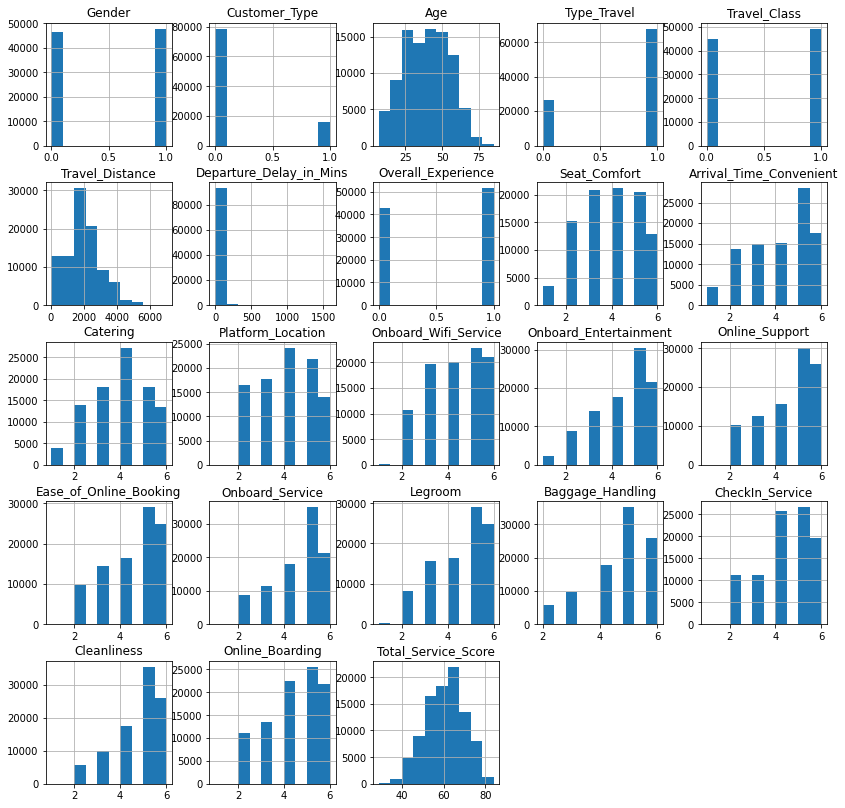

In [29]:
df2_train.hist(figsize = (14, 14))

plt.show()

<AxesSubplot:>

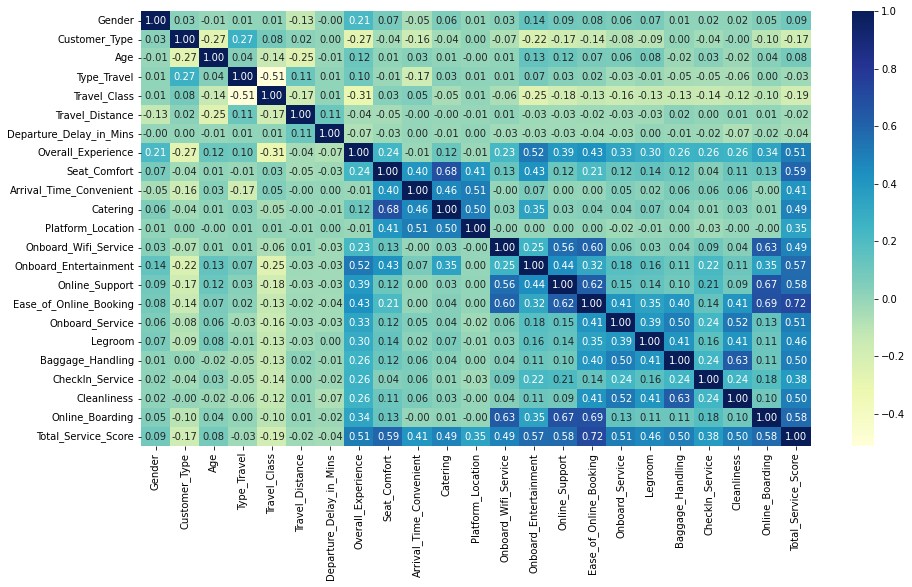

In [30]:
# Plotting the correlation between numerical variables
plt.figure(figsize = (15, 8))

sns.heatmap(df2_train.corr(), annot = True, fmt = '0.2f', cmap = 'YlGnBu')

In [31]:
df2_train.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Overall_Experience,Seat_Comfort,Arrival_Time_Convenient,...,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Total_Service_Score
0,1.0,0.0,52.0,1.0,0,272,0.0,0,3.0,6.0,...,3.0,4.0,3.0,3.0,4.0,3.0,5.0,3.0,2.0,56.0
1,0.0,0.0,48.0,0.0,1,2200,9.0,0,2.0,6.0,...,2.0,5.0,5.0,6.0,3.0,2.0,3.0,5.0,5.0,54.0
2,1.0,0.0,43.0,1.0,0,1061,77.0,1,3.0,3.0,...,5.0,6.0,6.0,6.0,6.0,6.0,5.0,6.0,6.0,67.0
3,1.0,0.0,44.0,1.0,0,780,13.0,0,4.0,3.0,...,3.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,54.0
4,1.0,0.0,50.0,1.0,0,1981,0.0,1,4.0,4.0,...,5.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,65.0


In [32]:
df2_test.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Seat_Comfort,Arrival_Time_Convenient,Catering,...,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Total_Service_Score
0,1.0,0.0,36.0,1.0,0,532,0.0,4.0,4.0,4.0,...,6.0,5.0,6.0,6.0,6.0,6.0,5.0,6.0,2.0,67.0
1,1.0,1.0,21.0,1.0,0,1425,9.0,1.0,5.0,2.0,...,2.0,4.0,4.0,6.0,4.0,5.0,4.0,6.0,4.0,55.0
2,0.0,0.0,60.0,1.0,0,2832,0.0,6.0,6.0,6.0,...,6.0,6.0,3.0,3.0,3.0,3.0,5.0,3.0,6.0,68.0
3,1.0,0.0,29.0,0.0,1,1352,0.0,4.0,6.0,4.0,...,4.0,6.0,2.0,4.0,3.0,6.0,6.0,6.0,2.0,61.0
4,0.0,1.0,18.0,1.0,0,1610,17.0,6.0,1.0,6.0,...,6.0,6.0,6.0,5.0,4.0,6.0,6.0,6.0,6.0,73.0


In [33]:
from sklearn.model_selection import StratifiedKFold

X = df2_train.drop(columns=["Overall_Experience"]).reset_index(drop=True)
y = df2_train["Overall_Experience"].reset_index(drop=True)

# === Step 2: Cross-validation setup ===
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = []
accuracies = []

# === Step 3: Cross-validation loop ===
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"\n Fold {fold + 1}")

    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

# === Step 3: Cross-validation loop ===
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"\n Fold {fold + 1}")

    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]



    # === Step 4: Scale ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


    # === Step 5: Train Random Forest ===
model = RandomForestClassifier(
     
    
    n_estimators=400,
    max_depth=None,
    min_samples_leaf=1,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
model.fit(X_train_scaled, y_train)









 Fold 1

 Fold 2

 Fold 3

 Fold 4

 Fold 5

 Fold 1

 Fold 2

 Fold 3

 Fold 4

 Fold 5


RandomForestClassifier(class_weight='balanced', n_estimators=400, n_jobs=-1,
                       random_state=42)

In [34]:
# Check class balance
print("Train distribution:\n", y_train.value_counts())
print("Validation distribution:\n", y_val.value_counts())

Train distribution:
 1    41275
0    34229
Name: Overall_Experience, dtype: int64
Validation distribution:
 1    10318
0     8557
Name: Overall_Experience, dtype: int64


In [35]:
y_pred = model.predict(X_val_scaled)

acc = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
cm = confusion_matrix(y_val, y_pred)

accuracies.append(acc)
f1_scores.append(f1)

print(f" Accuracy: {acc:.4f}")
print(f" F1 Score: {f1:.4f}")
print(" Classification Report:\n", classification_report(y_val, y_pred))
print(" Confusion Matrix:\n", cm)

 Accuracy: 0.9505
 F1 Score: 0.9546
 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      8557
           1       0.96      0.95      0.95     10318

    accuracy                           0.95     18875
   macro avg       0.95      0.95      0.95     18875
weighted avg       0.95      0.95      0.95     18875

 Confusion Matrix:
 [[8127  430]
 [ 504 9814]]


In [36]:
# === Step 7: Final average performance ===
print("\n Average Accuracy:", np.mean(accuracies))
print(" Average F1 Score:", np.mean(f1_scores))


 Average Accuracy: 0.9505165562913908
 Average F1 Score: 0.954576403073631


In [37]:
# === Step 8: Train on full training set for final model ====
# ============================================================

scaler_full = StandardScaler()
X_full_scaled = scaler_full.fit_transform(X)
X_test_scaled = scaler_full.transform(df2_test)  # test set already preprocessed

final_model = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_leaf=1,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
final_model.fit(X_full_scaled, y)

# === Step 9: Predict on test set ===
test_preds = final_model.predict(X_test_scaled)

In [38]:
# === Step 10: Create submission file ===
# Use real IDs from travel_test
submission = pd.DataFrame({
    "ID": travel_test["ID"],  # assumes you still have original test IDs
    "Overall_Experience": test_preds
})

submission.to_csv("submission.csv", index=False)
print("\n submission.csv created and saved.")


 submission.csv created and saved.
